In [1]:
# import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# set the default colormap
import seaborn as sns
sns.set_theme(style='whitegrid')

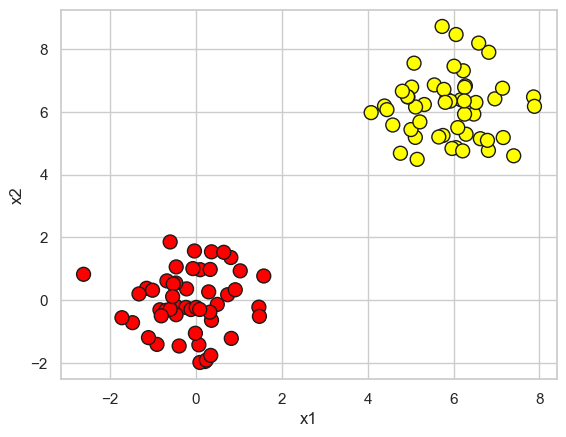

In [2]:
# generate an artificial dataset
X, y = make_blobs(n_samples=100, n_features=2,
                  centers=[[0, 0], [6, 6]],
                  cluster_std=1,
                  random_state=42)

y = np.where(y == 0, -1, 1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, marker='o', edgecolors= 'k', cmap='autumn')

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [3]:
from cvxopt import matrix, solvers

In [18]:
# implementing HardMarginSVM from scratch
class HardMarginSVM:
    def __init__(self):
        self.w = None
        self.b = None
        self._support_vectors = None

        # Required for plotting
        self.X = None
        self.y = None

        # n is the number of data points
        self.n = 0

        # d is the number of dimensions
        self.d = 0

    def fit(self, X, y):
        # store X and y for plotting
        self.X, self.y = X, y

        # extract the shape
        self.n, self.d = X.shape

        # P is the coefficient of the quadratic terms
        P = matrix(np.outer(y, y) * np.dot(X, X.T))
        # q is the coefficient of the linear terms
        q = matrix(-1 * np.ones(self.n))
        # G is the coefficients of constraints alpha_1 >= 0, alpha_2 >= 0, ... alpha_n >= 0
        G = matrix(np.diag(-1 * np.ones(self.n)))
        # h is the vector of zeros
        h = matrix(np.zeros(self.n))
        # 'A' is the matrix of coefficient of equality constraints
        A = matrix(y.reshape(1, -1), tc='d')
        # b is the scalar of the equality present on RHS side
        b = matrix(0.0)
        
        # solve the qp optimization
        solution = solvers.qp(P, q, G, h, A, b)
        self.multipliers = np.array(solution['x']).flatten()

        # compute w
        self.w = X.T.dot(self.multipliers * self.y)

        # finding the support vectors
        threshold = 1e-7
        self._support_vectors = self.X[self.multipliers > threshold]
        support_vectors_y = y[self.multipliers > threshold]

        # compute b
        self.b = np.mean(support_vectors_y - self._support_vectors.dot(self.w))

        # return self.w, self.b
    
    def predict(self, X):
        return np.sign(self.__decision_function(X))

    def __decision_function(self, X):
        return np.dot(X, self.w) + self.b

    def plot_decision_boundary(self):
        plt.figure(figsize=(18, 10))
        
        plt.scatter(self.X[:, 0], self.X[:, 1], c=y, marker='o', s=100, edgecolors='k', cmap='autumn')

        xx = np.linspace(self.X[:, 0].min(), self.X[:, 0].max(), 100)
        yy = np.linspace(self.X[:, 1].min(), self.X[:, 1].max(), 100)
        XX, YY = np.meshgrid(xx, yy)
        xy = np.vstack((XX.ravel(), YY.ravel())).T
        Z = self.__decision_function(xy)

        plt.contour(XX, YY, Z.reshape(XX.shape), levels=[-1, 0, 1],
                    linestyles=["--", "-", "--"], linewidths=[2.0, 2.0, 2.0], colors=['k', 'crimson', 'k'])
        

        # highlight the support vectors
        plt.scatter(self._support_vectors[:, 0], self._support_vectors[:, 1], s=250,
                   facecolor='none', edgecolors='k', linewidths=1)
        
        legend_elements = [
    plt.Line2D([0], [0], color='crimson', linestyle='-', label='Hyperplane'),
    plt.Line2D([0], [0], color='k', linestyle='--', label='Bounding Planes'),
    plt.Line2D([0], [0], marker='o', markerfacecolor='none', markeredgecolor='k', markersize=10, 
               linestyle='none', label='Support Vectors'),
    plt.Line2D([0], [0], marker='o', markerfacecolor='red', markeredgecolor='k', linestyle='none', markersize=5,
               label = 'Negative Class'),
    plt.Line2D([0], [0], marker='o', markerfacecolor='yellow', markeredgecolor='k', linestyle='none', markersize=5,
               label = 'Positive Class')          
    ]

        
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.legend(handles = legend_elements, loc='center left', bbox_to_anchor = (1, 0.5))
        plt.show()

     pcost       dcost       gap    pres   dres
 0: -4.4104e+00 -6.5098e+00  2e+02  1e+01  1e+00
 1: -1.5481e+00 -3.3273e-01  1e+01  9e-01  1e-01
 2: -1.3211e-02 -1.6962e-01  3e-01  7e-03  8e-04
 3: -4.7291e-02 -8.1784e-02  4e-02  2e-04  2e-05
 4: -6.4243e-02 -8.5663e-02  2e-02  5e-05  6e-06
 5: -7.7755e-02 -7.8768e-02  1e-03  2e-06  2e-07
 6: -7.8590e-02 -7.8616e-02  3e-05  4e-08  4e-09
 7: -7.8611e-02 -7.8612e-02  1e-06  5e-10  5e-11
 8: -7.8612e-02 -7.8612e-02  8e-08  4e-12  4e-13
Optimal solution found.


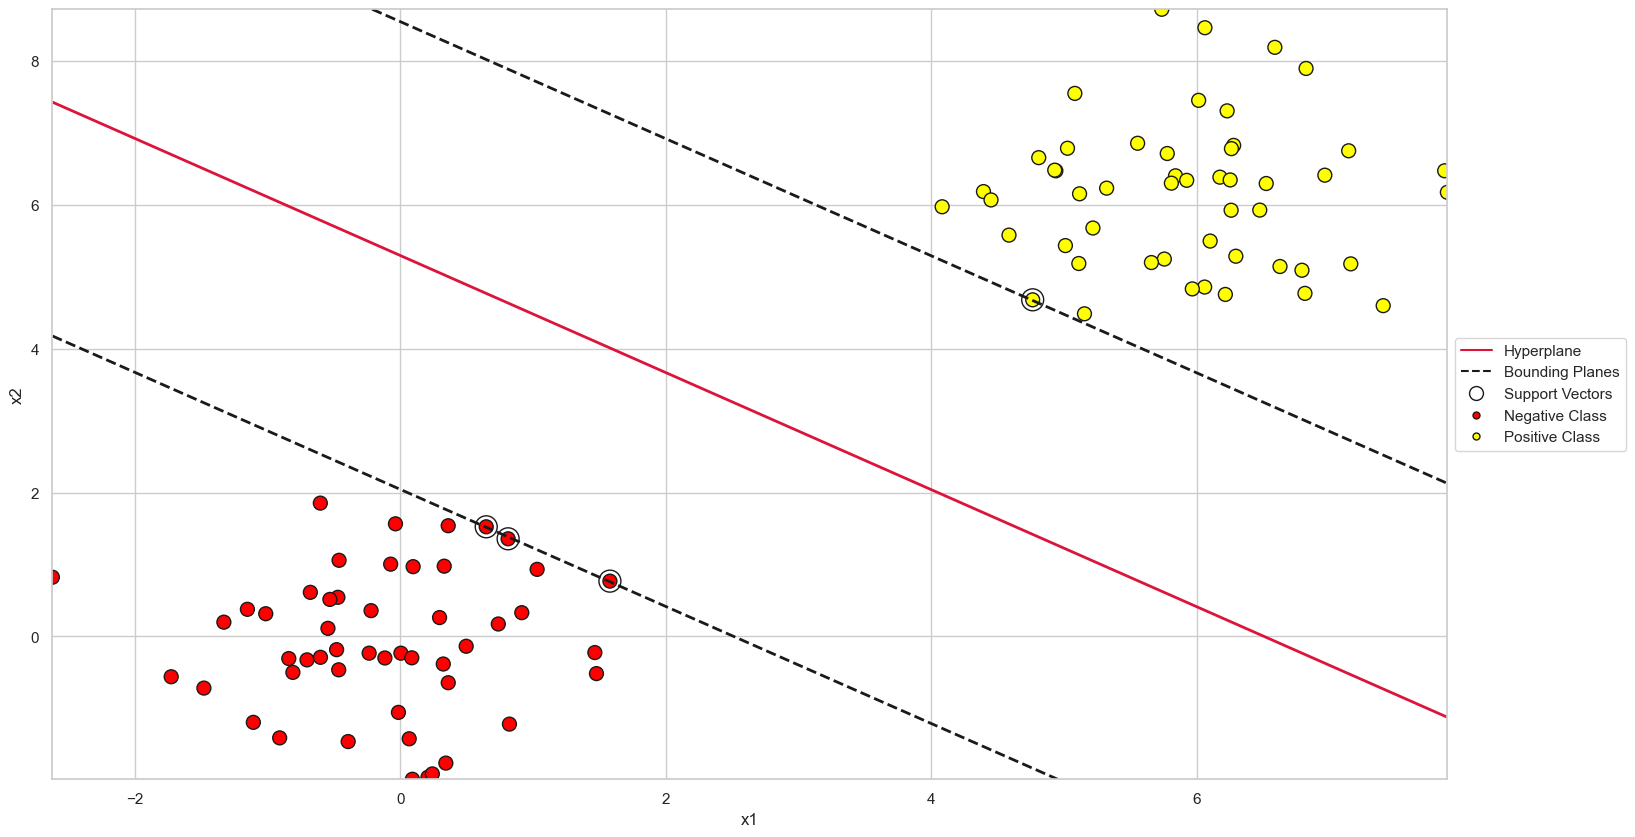

In [19]:
svm = HardMarginSVM()
svm.fit(X, y)
svm.plot_decision_boundary()

Text(-3, 6, 'New Point : (4, 8)')

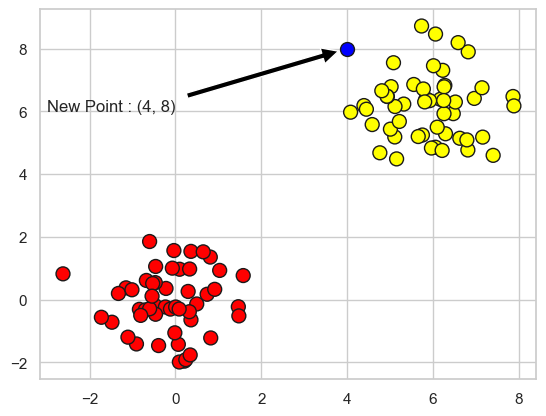

In [50]:
# making prediction for new query point
newQueryPoint = np.array([4, 8])

plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap='autumn')

plt.scatter(newQueryPoint[0], newQueryPoint[1], c='blue', s=100, marker='o', edgecolors='k')

plt.annotate(text='New Point : (4, 8)', xy=tuple(newQueryPoint),
             xytext=(-3, 6), arrowprops=dict(facecolor = 'black', shrink=0.05))


In [48]:
# predict the class of the query point
svm.predict(newQueryPoint)

1.0

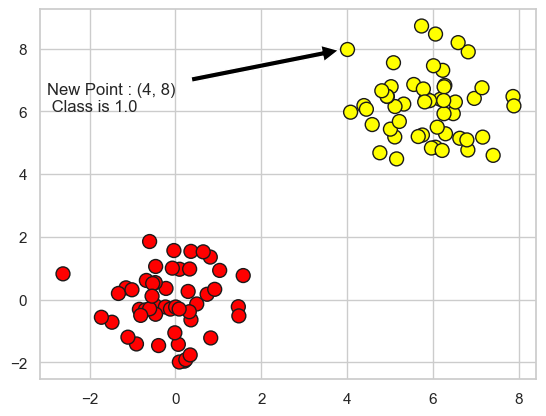

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolors='k', marker='o', cmap='autumn')

plt.scatter(newQueryPoint[0], newQueryPoint[1], c='yellow', s=100, marker='o', edgecolors='k')

plt.annotate(text=f'New Point : (4, 8) \n Class is {svm.predict(newQueryPoint)}', xy=tuple(newQueryPoint),
             xytext=(-3, 6), arrowprops=dict(facecolor = 'black', shrink=0.05))
plt.show()